### Technical Indicators

A lot of investors follow technical indicators. I'm gonna include the most popular ones as independent features. I'll be using this excellent [library](https://technical-analysis-library-in-python.readthedocs.io/en/latest/) for Technical Analysis to financial time series datasets (open, close, high, low, volume), for feature engineering.

In [37]:
import ta
import pandas as pd
from utils import get_apple_stock, plot_columns, load_csv_with_dates
from utils import plot_series, plot_field_over_time, get_range

In [3]:
def add_technical_indicators(df, dropna=False):
    copy = df.copy()
    
    # Momentum Indicators 
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#momentum-indicators
    copy['ao'] = ta.momentum.ao(copy['High'], copy['Low'], s=5, len=34, fillna=False)
    copy['mfi_14'] = ta.momentum.money_flow_index(copy['High'], copy['Low'], copy['Close'], copy['Volume'], n=14, fillna=False)
    copy['rsi_14'] = ta.momentum.rsi(copy['Close'], n=14, fillna=False)
    copy['so_14'] = ta.momentum.stoch(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    copy['so_sig_14'] = ta.momentum.stoch_signal(copy['High'], copy['Low'], copy['Close'], n=14, d_n=3, fillna=False)
    copy['tsi'] = ta.momentum.tsi(copy['Close'], r=25, s=13, fillna=False)
    copy['uo'] = ta.momentum.uo(copy['High'], copy['Low'], copy['Close'], s=7, m=14, len=28, ws=4.0, wm=2.0, wl=1.0, fillna=False)
    copy['wr'] = ta.momentum.wr(copy['High'], copy['Low'], copy['Close'], lbp=14, fillna=False)
    
    # Volume Indicators
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#volume-indicators
    copy['adi'] = ta.volume.acc_dist_index(copy['High'], copy['Low'], copy['Close'], copy['Volume'], fillna=False)
    copy['cmf'] = ta.volume.chaikin_money_flow(copy['High'], copy['Low'], copy['Close'], copy['Volume'], n=20, fillna=False)
    copy['eom_20'] = ta.volume.ease_of_movement(copy['High'], copy['Low'], copy['Close'], copy['Volume'], n=20, fillna=False)
    copy['fi2'] = ta.volume.force_index(copy['Close'], copy['Volume'], n=2, fillna=False)
    copy['nvi'] = ta.volume.negative_volume_index(copy['Close'], copy['Volume'], fillna=False)
    copy['obv'] = ta.volume.on_balance_volume(copy['Close'], copy['Volume'], fillna=False)
    copy['vpt'] = ta.volume.volume_price_trend(copy['Close'], copy['Volume'], fillna=False)
    
    # Volatility Indicators
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#volatility-indicators
    copy['atr_14'] = ta.volatility.average_true_range(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    copy['b_hband_20'] = ta.volatility.bollinger_hband(copy['Close'], n=20, ndev=2, fillna=False)
    copy['b_hband_ind_20'] = ta.volatility.bollinger_hband_indicator(copy['Close'], n=20, ndev=2, fillna=False)
    copy['b_lband_20'] = ta.volatility.bollinger_lband(copy['Close'], n=20, ndev=2, fillna=False)
    copy['b_lband_ind_20'] = ta.volatility.bollinger_lband_indicator(copy['Close'], n=20, ndev=2, fillna=False)
    copy['mavg_10'] = ta.volatility.bollinger_mavg(copy['Close'], n=10, fillna=False)
    copy['mavg_20'] = ta.volatility.bollinger_mavg(copy['Close'], n=20, fillna=False)
    copy['mavg_50'] = ta.volatility.bollinger_mavg(copy['Close'], n=50, fillna=False)
    copy['mavg_200'] = ta.volatility.bollinger_mavg(copy['Close'], n=200, fillna=False)
    copy['dc_hband_20'] = ta.volatility.donchian_channel_hband(copy['Close'], n=20, fillna=False)
    copy['dc_hband_ind_20'] = ta.volatility.donchian_channel_hband_indicator(copy['Close'], n=20, fillna=False)
    copy['dc_lband_20'] = ta.volatility.donchian_channel_lband(copy['Close'], n=20, fillna=False)
    copy['dc_lband_ind_20'] = ta.volatility.donchian_channel_lband_indicator(copy['Close'], n=20, fillna=False)
    copy['kc_10'] = ta.volatility.keltner_channel_central(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_hband_10'] = ta.volatility.keltner_channel_hband(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_hband_ind_10'] = ta.volatility.keltner_channel_hband_indicator(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_lband_10'] = ta.volatility.keltner_channel_lband(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_lband_ind_10'] = ta.volatility.keltner_channel_lband_indicator(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)

    # Trend Indicators
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#trend-indicators
    # copy['adx14'] = ta.trend.adx(copy['High'], copy['Low'], copy['Close'], n=14, fillna=True)
    # copy['adx_neg14'] = ta.trend.adx_neg(copy['High'], copy['Low'], copy['Close'], n=14, fillna=True)
    # copy['adx_pos14'] = ta.trend.adx_pos(copy['High'], copy['Low'], copy['Close'], n=14, fillna=True)
    copy['ai_down25'] = ta.trend.aroon_down(copy['Close'], n=25, fillna=False)
    copy['ai_up25'] = ta.trend.aroon_up(copy['Close'], n=25, fillna=False)
    copy['cci20'] = ta.trend.cci(copy['High'], copy['Low'], copy['Close'], n=20, c=0.015, fillna=False)
    copy['dpo20'] = ta.trend.dpo(copy['Close'], n=20, fillna=False)
    copy['ema12'] = ta.trend.ema_indicator(copy['Close'], n=12, fillna=False)
    copy['ema26'] = ta.trend.ema_indicator(copy['Close'], n=26, fillna=False)
    copy['ichimoku_a'] = ta.trend.ichimoku_a(copy['High'], copy['Low'], n1=9, n2=26, visual=False, fillna=False)
    copy['ichimoku_b'] = ta.trend.ichimoku_b(copy['High'], copy['Low'], n2=26, n3=52, visual=False, fillna=False)
    copy['kst'] = ta.trend.kst(copy['Close'], r1=10, r2=15, r3=20, r4=30, n1=10, n2=10, n3=10, n4=15, fillna=False)
    copy['kst_sig'] = ta.trend.kst_sig(copy['Close'], r1=10, r2=15, r3=20, r4=30, n1=10, n2=10, n3=10, n4=15, nsig=9, fillna=False)
    copy['macd'] = ta.trend.macd(copy['Close'], n_fast=12, n_slow=26, fillna=False)
    copy['macd_diff'] = ta.trend.macd_diff(copy['Close'], n_fast=12, n_slow=26, n_sign=9, fillna=False)
    copy['macd_sig'] = ta.trend.macd_signal(copy['Close'], n_fast=12, n_slow=26, n_sign=9, fillna=False)
    copy['mi'] = ta.trend.mass_index(copy['High'], copy['Low'], n=9, n2=25, fillna=False)
    copy['trix_15'] = ta.trend.trix(copy['Close'], n=15, fillna=False)
    copy['vi_neg_14'] = ta.trend.vortex_indicator_neg(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    copy['vi_pos_14'] = ta.trend.vortex_indicator_pos(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    
    # Others Indicators
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#others-indicators
    copy['cr'] = ta.others.cumulative_return(copy['Close'], fillna=False)
    copy['dlr'] = ta.others.daily_log_return(copy['Close'], fillna=False)
    copy['dr'] = ta.others.daily_return(copy['Close'], fillna=False)
    
    if dropna is True:
        return copy.dropna() # we drop all the rows that contain at least one NaN
    
    return copy

In [4]:
apple_stock = get_apple_stock()

In [5]:
featured_series = add_technical_indicators(apple_stock)

In [6]:
featured_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9699 entries, 1980-12-12 to 2019-05-31
Data columns (total 58 columns):
Open               9699 non-null float64
High               9699 non-null float64
Low                9699 non-null float64
Close              9699 non-null float64
Volume             9699 non-null float64
ao                 9699 non-null float64
mfi_14             9699 non-null float64
rsi_14             9685 non-null float64
so_14              9699 non-null float64
so_sig_14          9699 non-null float64
tsi                9699 non-null float64
uo                 9699 non-null float64
wr                 9699 non-null float64
adi                9699 non-null float64
cmf                9699 non-null float64
eom_20             9698 non-null float64
fi2                9697 non-null float64
nvi                9699 non-null float64
obv                9326 non-null float64
vpt                9699 non-null float64
atr_14             9699 non-null float64
b_hband_20    

Let's see if we have null values

In [7]:
featured_series.isnull().sum().sum()

591

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

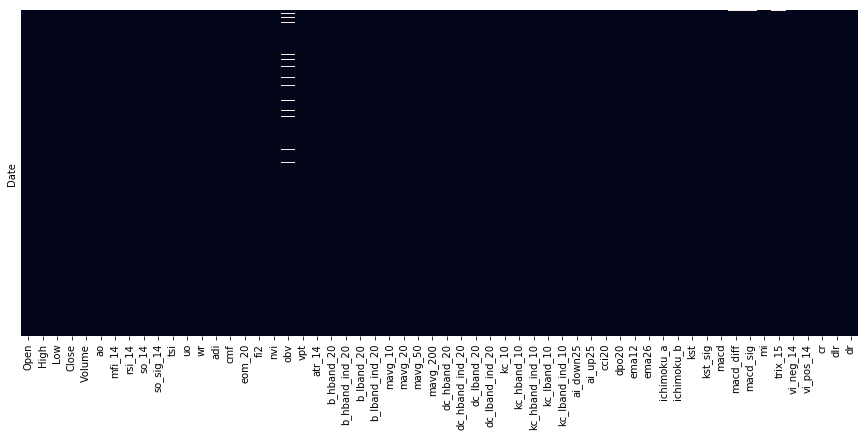

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(featured_series.isnull(), cbar=False, yticklabels=False)

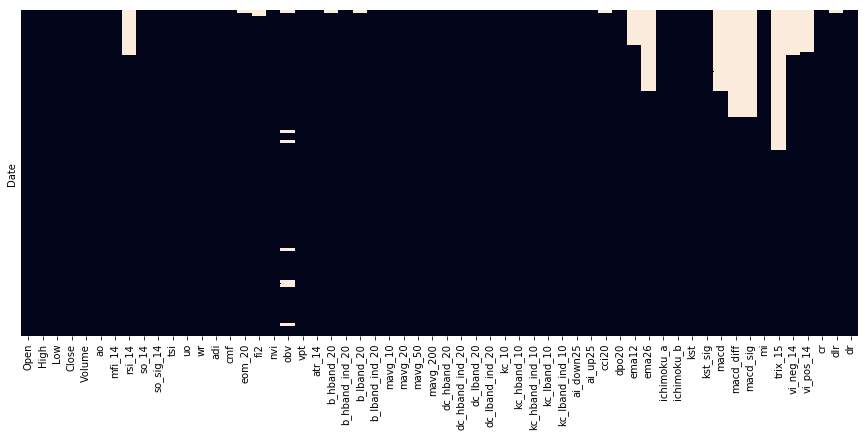

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(featured_series.isnull().head(100), cbar=False, yticklabels=False)

`obv` (On-balance volume) has lots of random null values. Let's drop this column

In [11]:
featured_series.drop(columns=['obv'], axis=1, inplace=True)

Now let's drop all the rows that have null values. We won't discontinue the series because these are all at the beginning. They are used to calculate next values in the series, but they have null values because they need previous ones that simply don't exist.

In [12]:
featured_series.dropna(inplace=True)

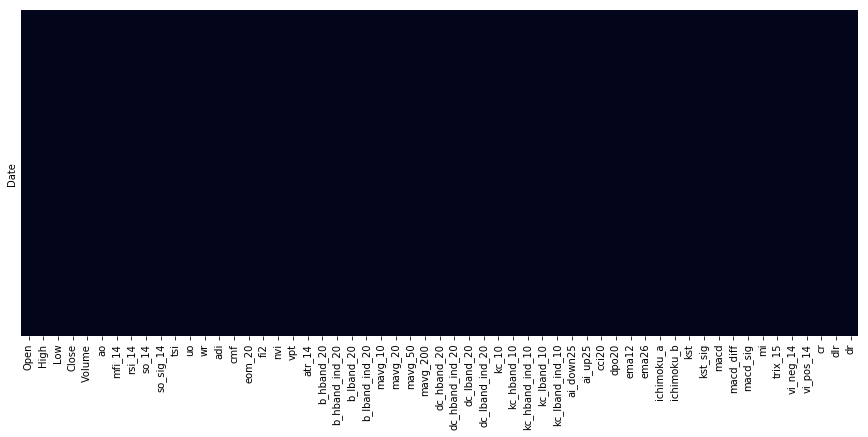

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(featured_series.isnull(), cbar=False, yticklabels=False)

Looks like there are no more null values. Let's have a look at some columns:

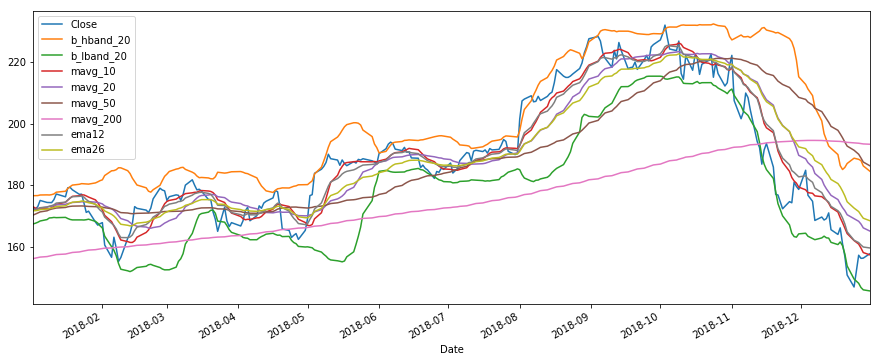

In [14]:
plot_columns(featured_series, 
             ['Close', 
              'b_hband_20', 
              'b_lband_20', 
              'mavg_10', 
              'mavg_20', 
              'mavg_50', 
              'mavg_200', 
              'ema12', 
              'ema26'], 
             fromTo=('2018-1-1', '2018-12-31'))

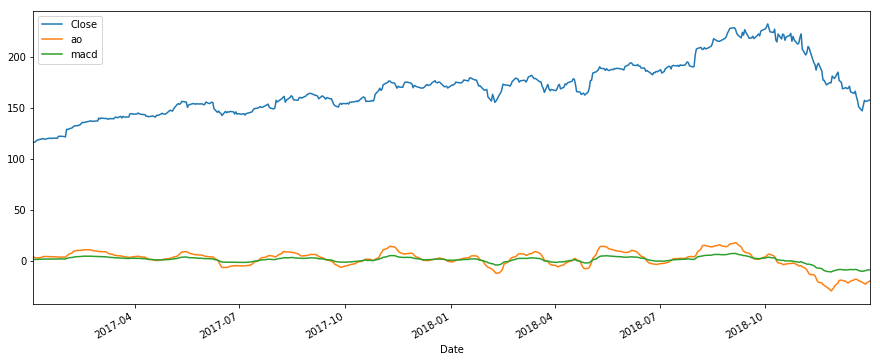

In [15]:
plot_columns(featured_series, ['Close', 'ao', 'macd'], fromTo=('2017-1-1', '2018-12-31'))

### Other features and assets

Let's add more features. How about adding the CPI?

In [16]:
# https://fred.stlouisfed.org/series/CPIAUCSL
cpi = load_csv_with_dates('datasets/CPIAUCSL_FRED_19470101-20190401.csv')

# https://fred.stlouisfed.org/series/CPIAUCNS
# cpi = load_csv_with_dates('datasets/CPIAUCNS_FRED-19130101-20190401.csv')

In [17]:
cpi.head()

,CPIAUCSL
DATE,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [18]:
cpi.isnull().sum()

CPIAUCSL    0
dtype: int64

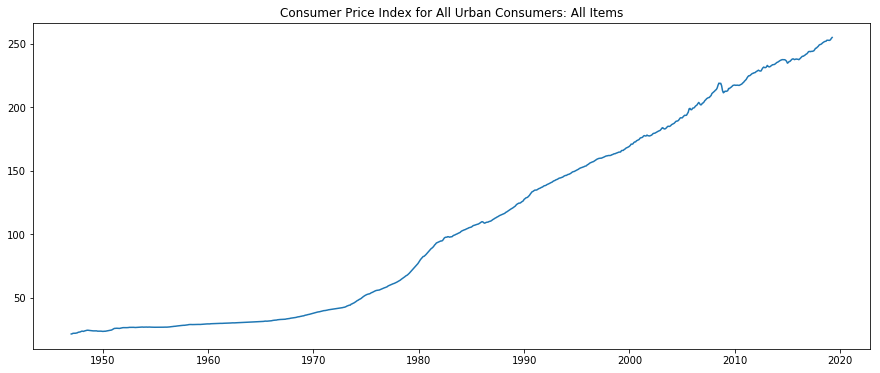

In [19]:
plot_series(cpi, title='Consumer Price Index for All Urban Consumers: All Items')

We need to first add all the missing days in cpi since the frequency of this index is monthly:

In [20]:
idx_date = pd.date_range(cpi.index[0], cpi.index[-1])
cpi_full = cpi.reindex(idx_date)
cpi_full.fillna(method='ffill', inplace=True)

In [21]:
cpi_full.head(n=35)

,CPIAUCSL
1947-01-01,21.48
1947-01-02,21.48
1947-01-03,21.48
1947-01-04,21.48
1947-01-05,21.48
1947-01-06,21.48
1947-01-07,21.48
1947-01-08,21.48
1947-01-09,21.48
1947-01-10,21.48


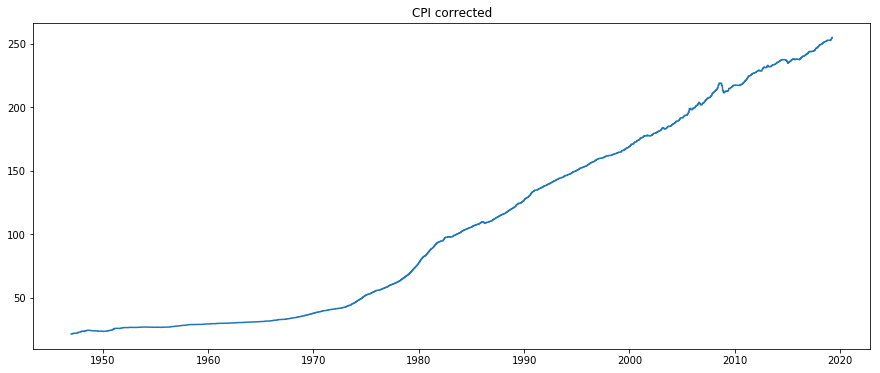

In [22]:
plot_series(cpi_full, title='CPI corrected')

In [23]:
featured_series = pd.merge(featured_series, cpi_full, left_index=True, right_index=True)

In [24]:
featured_series[['Close', 'CPIAUCSL']].describe()

,Close,CPIAUCSL
count,9614.000000,9614.000000
mean,27.332049,172.143264
std,48.201573,48.401359
min,0.196429,88.000000
25%,1.062500,131.600000
50%,1.683661,170.000000
75%,26.964285,217.281000
max,232.070007,254.958000


### CBOE Volatility Index

The [CBOE Volatility Index](https://www.investopedia.com/terms/v/vix.asp) is a popular measure of the stock market's expectation of 30-day forward-looking volatility derived from the price inputs of the S&P 500 index options, it provides a measure of market risk and investors' sentiments.

In [25]:
# https://en.wikipedia.org/wiki/VIX
vix = load_csv_with_dates('datasets/VIX_yahoo-finance_19900102-20190531.csv')

In [26]:
vix.isnull().sum().sum()

0

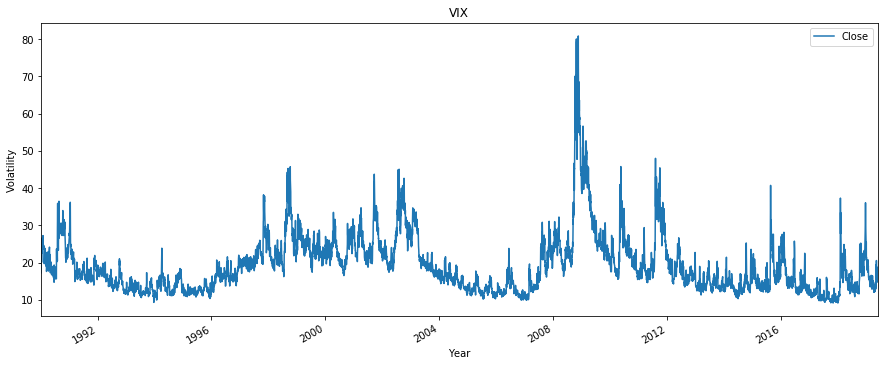

In [27]:
plot_field_over_time(vix, title='VIX', ylabel='Volatility')

In [28]:
featured_series = pd.merge(featured_series, 
                           vix['Close'], 
                           left_index=True, 
                           right_index=True, 
                           suffixes=('', '_vix'))

### Nasdaq 100 Index

The [Nasdaq 100 Index](https://www.investopedia.com/terms/n/nasdaq100.asp) is a basket of the 100 largest, most actively traded U.S companies listed on the Nasdaq stock exchange. The index includes companies from various industries except for the financial industry, like commercial and investment banks

In [29]:
# https://en.wikipedia.org/wiki/NASDAQ-100
ndx = load_csv_with_dates('datasets/NDX_yahoo-finance_19851001-20190531.csv')

In [30]:
ndx.isnull().sum().sum()

0

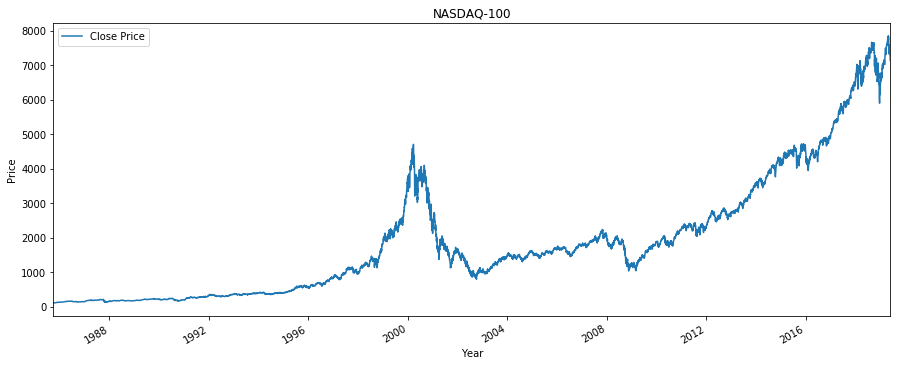

In [31]:
plot_field_over_time(ndx, title='NASDAQ-100', ylabel='Price', ylegend='Close Price')

In [32]:
featured_series = pd.merge(featured_series, 
                           ndx['Close'], 
                           left_index=True, 
                           right_index=True, 
                           suffixes=('', '_ndx'))

In [33]:
featured_series[['Close', 'Close_vix', 'Close_ndx']].describe()

,Close,Close_vix,Close_ndx
count,7369.000000,7369.000000,7369.000000
mean,35.413233,19.252029,2124.274385
std,52.455141,7.785142,1737.822972
min,0.462054,9.140000,165.195007
25%,1.410714,13.610000,873.739990
50%,4.080357,17.379999,1653.760010
75%,57.177143,22.639999,2769.320068
max,232.070007,80.860001,7660.180176


In [34]:
featured_series.head()

,Open,High,Low,Close,Volume,ao,mfi_14,rsi_14,so_14,so_sig_14,...,mi,trix_15,vi_neg_14,vi_pos_14,cr,dlr,dr,CPIAUCSL,Close_vix,Close_ndx
1990-01-02,1.258929,1.339286,1.250000,1.330357,45799600.0,-0.184007,39.476730,55.206172,67.857200,39.550357,...,25.707347,-0.826148,1.168538,0.837078,159.130335,5.518597,5.673712,127.5,17.240000,227.725006
1990-01-03,1.357143,1.357143,1.339286,1.339286,51998800.0,-0.161922,57.222294,57.078261,90.909183,63.107374,...,25.688108,-0.807284,1.054052,1.108107,160.869548,0.668931,0.671173,127.5,18.190001,226.100006
1990-01-04,1.366071,1.383929,1.330357,1.343750,55378400.0,-0.135163,60.234895,58.088697,81.999866,80.255416,...,25.639428,-0.777781,0.855261,1.065788,161.739058,0.332758,0.333312,127.5,19.219999,224.714996
1990-01-05,1.348214,1.366071,1.321429,1.348214,30828000.0,-0.107274,67.578297,59.197033,83.999731,85.636260,...,25.513407,-0.740123,0.859061,1.107381,162.608567,0.331654,0.332205,127.5,20.110001,223.139999
1990-01-08,1.339286,1.357143,1.321429,1.357143,25393200.0,-0.082773,80.716082,61.544120,84.999888,83.666495,...,25.412580,-0.695797,0.795619,1.233576,164.347780,0.660100,0.662284,127.5,20.260000,223.539993


Before we continue, we're gonna shorten the series starting from `2003-01-01`

In [38]:
featured_series = get_range(featured_series, '2003-01-01')

### Feature Importance

In [39]:
print('Total number of features', len(featured_series.columns))

Total number of features 60


We have 60 features in our dataset. At this point it's important to consider whether they're all good indicatives of price movements. Let's find out how important these features are to predict prices. We're gonna make use of ensembles of decision tree methods like gradient boosting, XGBoost. XGBoost provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

In [40]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [41]:
def train_xgbregressor(series, look_ahead=5):
    '''
    XGBRegressor has some limitations that prevents us from using
    multiple dimensions inputs and outputs. But we can still use it
    to predict the price x days ahead based on one day of features
    '''
    X = series[:-look_ahead]
    y = series['Close'][look_ahead:]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

    regressor = XGBRegressor()
    regressor.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    
    return regressor

In [42]:
# For importance_type parameter 'gain' seems to be the most indicative of importance type
# https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7
def plot_feature_importance(regressor, 
                            title='Feature importance', 
                            importance_type='gain', 
                            max_num_features=20, 
                            figsize=(15, 12)):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    plot_importance(regressor, 
                    ax=ax, 
                    importance_type=importance_type, 
                    show_values=False, 
                    max_num_features=max_num_features)
    
    ax.set_title(title)

In [43]:
look_ahead = 5 # we want to see 5 trading days ahead
regressor = train_xgbregressor(featured_series, look_ahead)

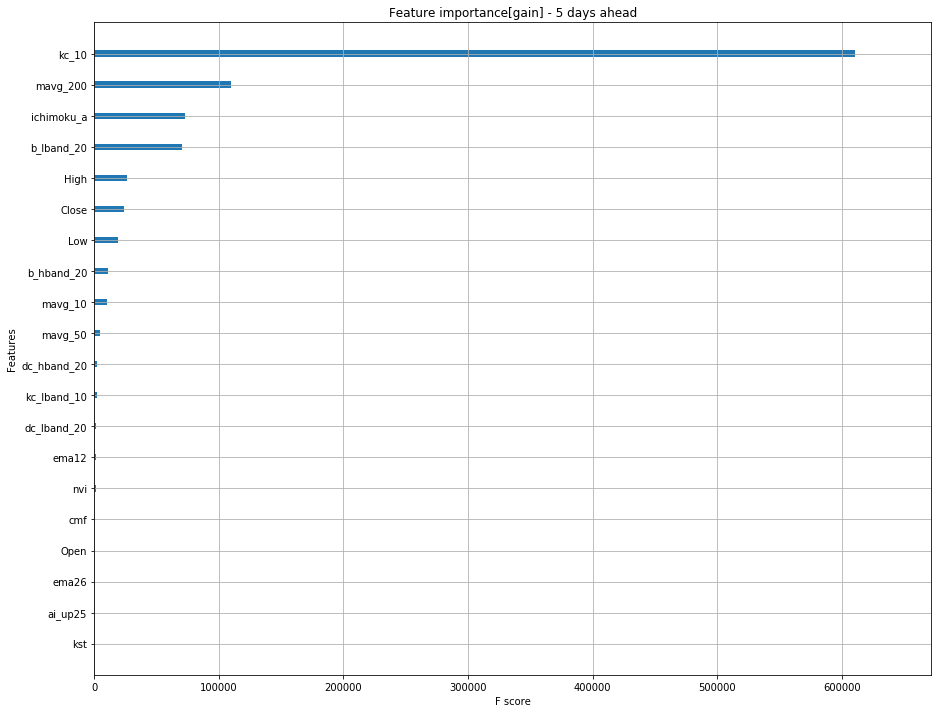

In [44]:
# let's see the results using `gain` as type of importance
plot_feature_importance(regressor, 
                        title='Feature importance[gain] - 5 days ahead', 
                        importance_type='gain')

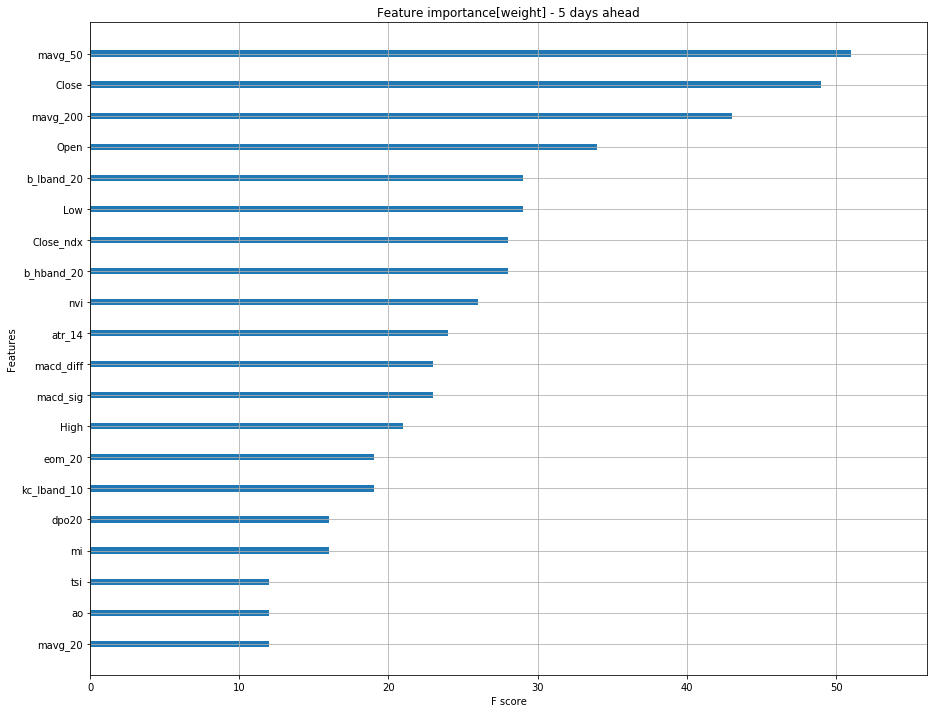

In [45]:
# let's see the results using `weight` as type of importance
plot_feature_importance(regressor, title='Feature importance[weight] - 5 days ahead', importance_type='weight')

As expected, Open, High, Low and Close have all high score. Close price won't change that much 5 days ahead.

In [50]:
# look_ahead = 4
# regressor = train_xgbregressor(featured_series, look_ahead)
# plot_feature_importance(regressor, 
#                         title='Feature importance[gain] - {} days ahead'.format(look_ahead), 
#                         importance_type='gain')
# plot_feature_importance(regressor, 
#                         title='Feature importance[gain] - {} days ahead'.format(look_ahead), 
#                         importance_type='weight')

### Features Correlation

Let's find out about their correlation. There is no reason to keep all the features that are highly correlated

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_range

In [372]:
def plot_heatmap_corr(series, title='', cmap='coolwarm', figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(series.corr(), cmap=cmap, annot=True, ax=ax, vmin=0, vmax=1)
    ax.set_title(title)

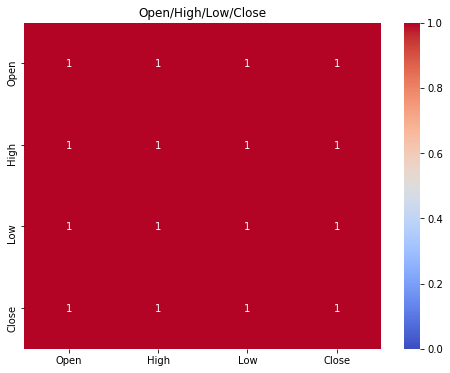

In [373]:
cols = ['Open', 'High', 'Low', 'Close']
plot_heatmap_corr(featured_series[cols], title='Open/High/Low/Close', figsize=(8, 6))

There is, for obvious reasons, high correlation between Open, High, Low and Close prices. Let's plot them to have a clearer picture

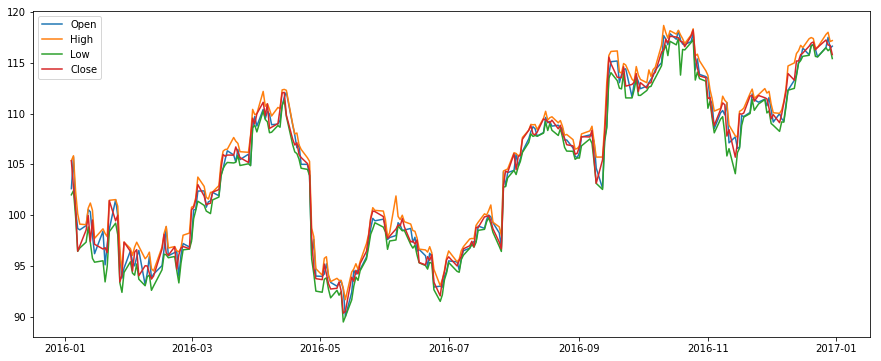

In [374]:
plot_series(get_range(featured_series[['Open', 'High', 'Low', 'Close']], 
                      '2016-01-01', 
                      '2016-12-31'), 
            legend=['Open', 'High', 'Low', 'Close'])

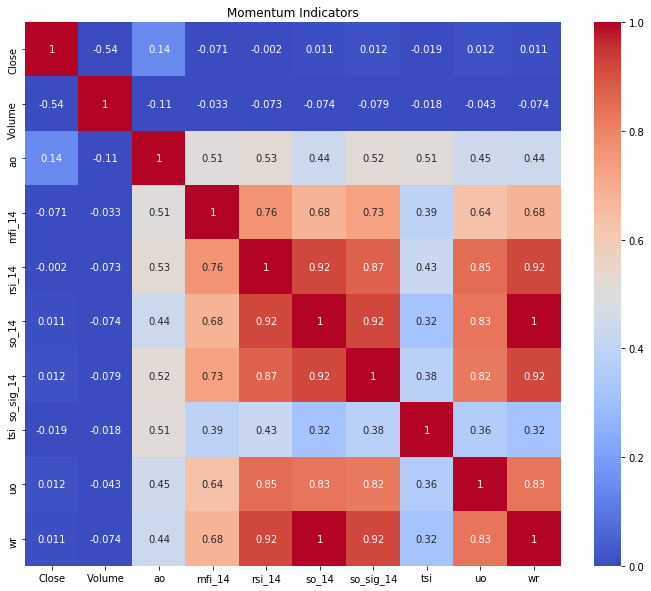

In [375]:
cols = ['Close', 'Volume', 'ao', 'mfi_14', 'rsi_14', 'so_14', 'so_sig_14', 'tsi', 'uo', 'wr']
plot_heatmap_corr(featured_series[cols], title='Momentum Indicators')

There seems to be high correlation between _Stochastic Oscillator(n=14)_ and _Williams %R_ indicator.

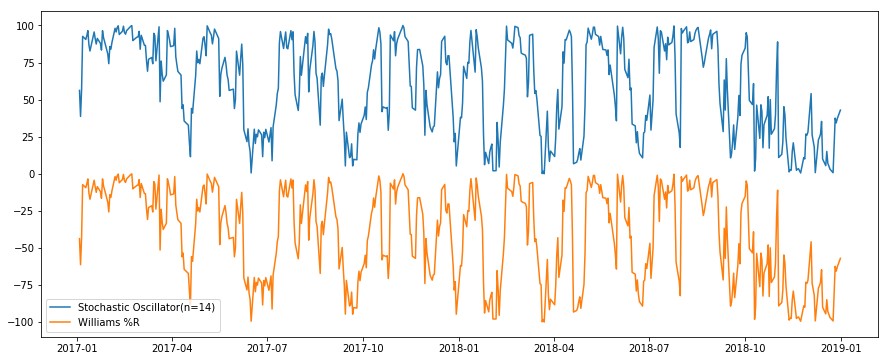

In [376]:
plot_series(get_range(featured_series[['so_14', 'wr']], 
                      '2017-01-01', 
                      '2018-12-31'), 
            legend=['Stochastic Oscillator(n=14)', 'Williams %R'])

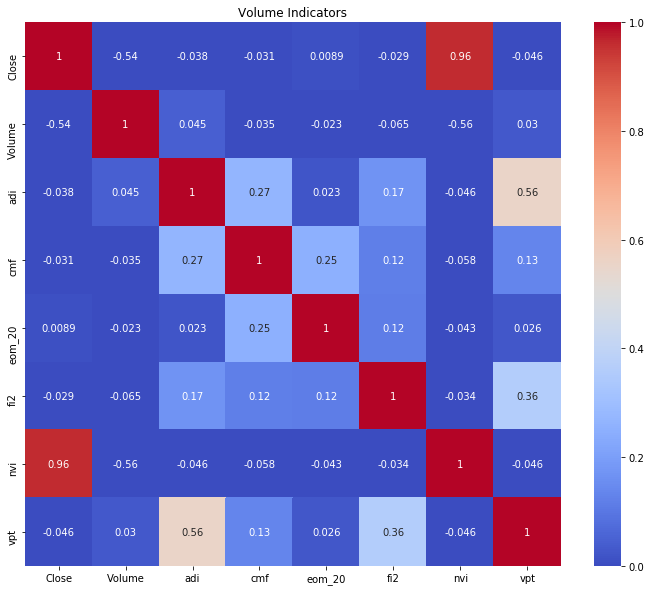

In [377]:
cols = ['Close', 'Volume', 'adi', 'cmf', 'eom_20', 'fi2', 'nvi', 'vpt']
plot_heatmap_corr(featured_series[cols], title='Volume Indicators')

No correlation among these indicators

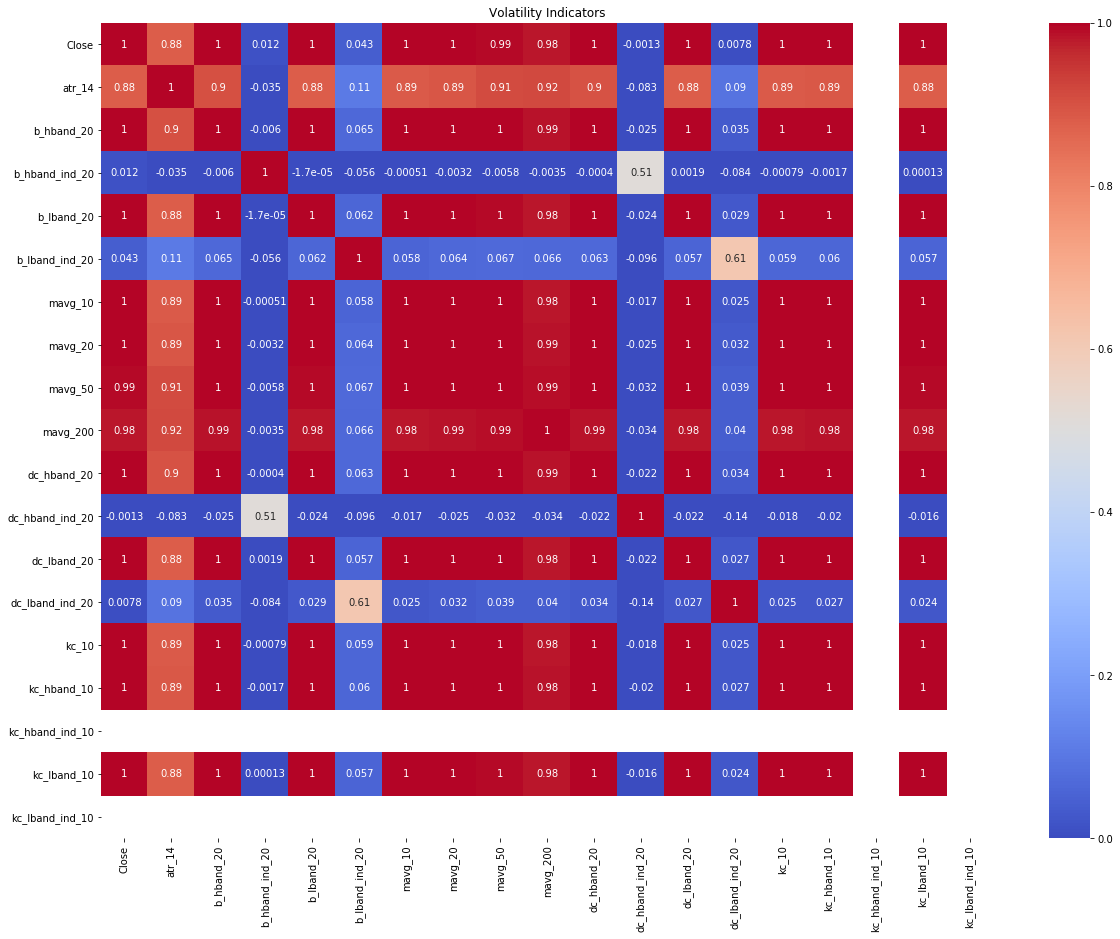

In [383]:
cols = ['Close', 
        'atr_14', 
        'b_hband_20', 
        'b_hband_ind_20', 
        'b_lband_20', 
        'b_lband_ind_20', 
        'mavg_10', 
        'mavg_20', 
        'mavg_50', 
        'mavg_200', 
        'dc_hband_20', 
        'dc_hband_ind_20', 
        'dc_lband_20', 
        'dc_lband_ind_20', 
        'kc_10', 
        'kc_hband_10', 
        'kc_hband_ind_10', 
        'kc_lband_10', 
        'kc_lband_ind_10']
plot_heatmap_corr(featured_series[cols], title='Volatility Indicators', figsize=(20, 15))

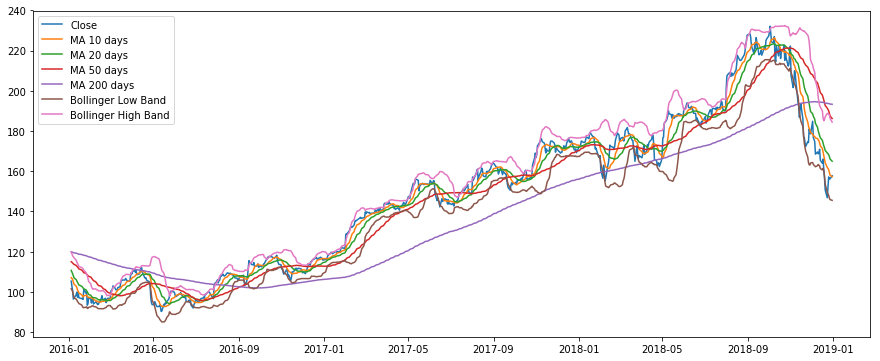

In [384]:
plot_series(get_range(featured_series[['Close', 'mavg_10', 'mavg_20', 'mavg_50', 'mavg_200', 'b_lband_20', 'b_hband_20']],
                      '2016-01-01', 
                      '2018-12-31'), 
            legend=['Close', 
                    'MA 10 days', 
                    'MA 20 days', 
                    'MA 50 days', 
                    'MA 200 days', 
                    'Bollinger Low Band', 
                    'Bollinger High Band'])

We have many highly correlated features. We can get rid off most of the the _Moving Average_, _Bollinger Bands_, _Donchian Channels_ and _Keltner Channels_

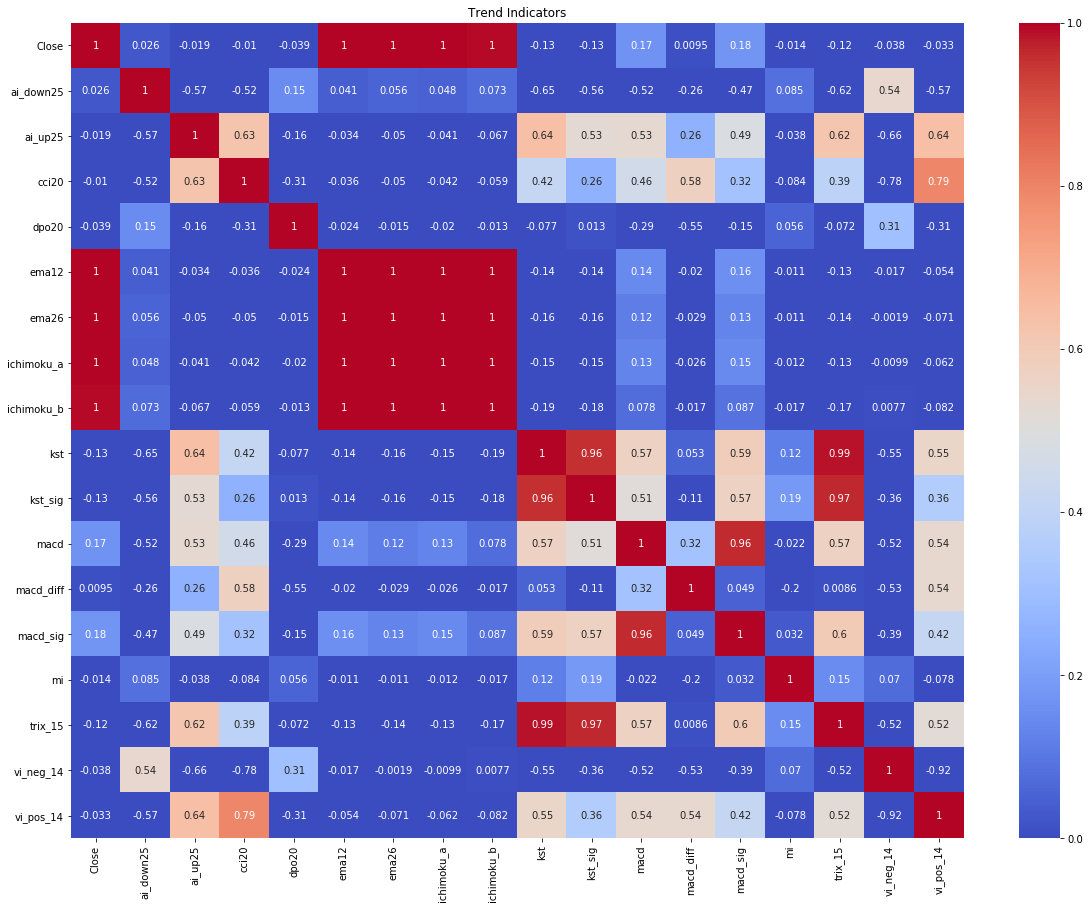

In [385]:
cols = ['Close', 
        'ai_down25', 
        'ai_up25', 
        'cci20', 
        'dpo20', 
        'ema12', 
        'ema26', 
        'ichimoku_a', 
        'ichimoku_b', 
        'kst', 
        'kst_sig', 
        'macd', 
        'macd_diff', 
        'macd_sig', 
        'mi', 
        'trix_15', 
        'vi_neg_14', 
        'vi_pos_14']
plot_heatmap_corr(featured_series[cols], title='Trend Indicators', figsize=(20, 15))

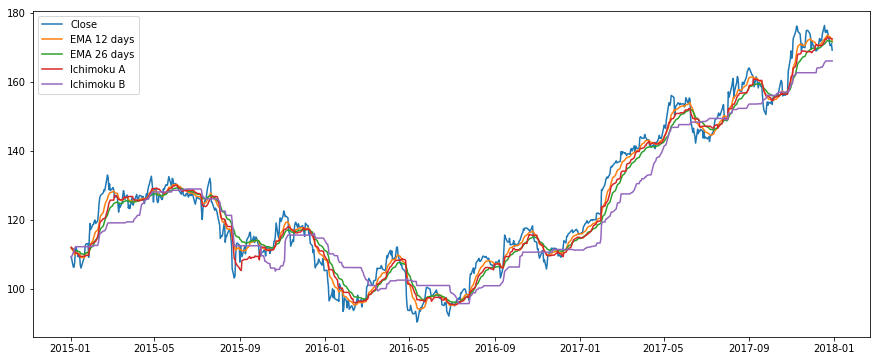

In [386]:
plot_series(get_range(featured_series[['Close', 'ema12', 'ema26', 'ichimoku_a', 'ichimoku_b']], 
                      '2015-01-01', 
                      '2017-12-31'), 
            legend=['Close', 'EMA 12 days', 'EMA 26 days', 'Ichimoku A', 'Ichimoku B'])

High correlation among the EMA, Ichimoku indicators and Close price

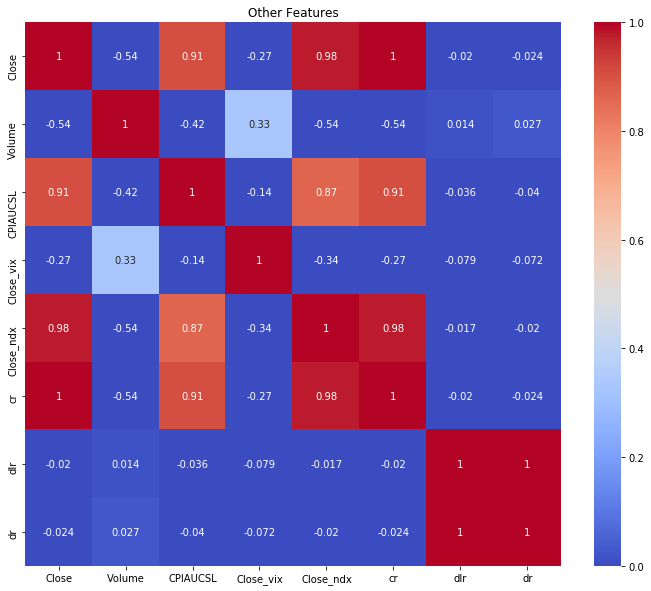

In [387]:
cols = ['Close',  
        'Volume',
        'CPIAUCSL', 
        'Close_vix',
        'Close_ndx', 
        'cr', 
        'dlr', 
        'dr']
plot_heatmap_corr(featured_series[cols], title='Other Features')

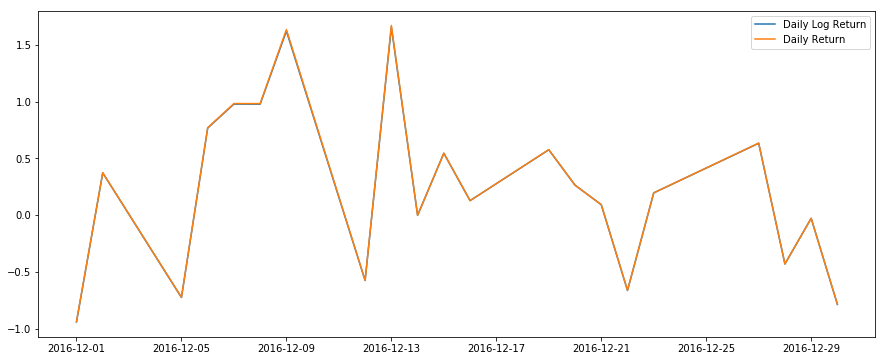

In [388]:
plot_series(get_range(featured_series[['dlr', 'dr']], 
                      '2016-12-01', 
                      '2016-12-31'), 
            legend=['Daily Log Return', 'Daily Return'])